In [1]:
import numpy as np
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 6

import seaborn as sns
import pandas as pd

from tqdm.notebook import tqdm

from scipy import stats

from sklearn import datasets


import openml

In [2]:
X_data_list = []
y_data_list = []
dataset_name = []

for task_num, task_id in enumerate(tqdm(openml.study.get_suite("OpenML-CC18").tasks)):
    try:
        successfully_loaded = True
        dataset = openml.datasets.get_dataset(openml.tasks.get_task(task_id).dataset_id)
        print(dataset)
        dataset_name.append(dataset.name)
        X, y, is_categorical, _ = dataset.get_data(
            dataset_format="array", target=dataset.default_target_attribute
        )
        _, y = np.unique(y, return_inverse = True)
        #X = np.nan_to_num(X[:, np.where(np.array(is_categorical) == False)[0]])
        X = np.nan_to_num(X)
    except TypeError:
        print("Skipping Dataset {}".format(dataset_idx))
        print()
        successfully_loaded = False
    if successfully_loaded and np.shape(X)[1] > 0:
        print('\n\nSuccess: ', task_num)
        X_data_list.append(X)
        y_data_list.append(y)

OpenML Dataset
Name..........: kr-vs-kp
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:28
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/3/kr-vs-kp.arff
OpenML URL....: https://www.openml.org/d/3
# of features.: 37
# of instances: 3196


Success:  0
OpenML Dataset
Name..........: letter
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:41
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/6/letter.arff
OpenML URL....: https://www.openml.org/d/6
# of features.: 17
# of instances: 20000


Success:  1
OpenML Dataset
Name..........: balance-scale
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:19:55
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/11/balance-scale.arff
OpenML URL....: https://www.openml.org/d/11
# of features.: 5
# of instances: 625


Success:  2
OpenML Dataset
Name..........: mfeat-factors
Version.......: 1
Format...

OpenML Dataset
Name..........: mnist_784
Version.......: 1
Format........: ARFF
Upload Date...: 2014-09-29 03:28:38
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/52667/mnist_784.arff
OpenML URL....: https://www.openml.org/d/554
# of features.: 785
# of instances: 70000


Success:  27
OpenML Dataset
Name..........: pc4
Version.......: 1
Format........: ARFF
Upload Date...: 2014-10-06 23:57:12
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/53932/pc4.arff
OpenML URL....: https://www.openml.org/d/1049
# of features.: 38
# of instances: 1458


Success:  28
OpenML Dataset
Name..........: pc3
Version.......: 1
Format........: ARFF
Upload Date...: 2014-10-06 23:57:13
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/53933/pc3.arff
OpenML URL....: https://www.openml.org/d/1050
# of features.: 38
# of instances: 1563


Success:  29
OpenML Dataset
Name..........: jm1
Version.......: 1
Format........: ARF



Success:  53
OpenML Dataset
Name..........: dresses-sales
Version.......: 2
Format........: ARFF
Upload Date...: 2016-04-11 19:57:27
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/1910507/dresses-sales.arff
OpenML URL....: https://www.openml.org/d/23381
# of features.: 13
# of instances: 500


Success:  54
OpenML Dataset
Name..........: texture
Version.......: 1
Format........: ARFF
Upload Date...: 2016-07-29 21:03:14
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/4535764/texture.arff
OpenML URL....: https://www.openml.org/d/40499
# of features.: 41
# of instances: 5500


Success:  55
OpenML Dataset
Name..........: connect-4
Version.......: 2
Format........: ARFF
Upload Date...: 2017-04-06 12:13:15
Licence.......: public
Download URL..: https://www.openml.org/data/v1/download/4965243/connect-4.arff
OpenML URL....: https://www.openml.org/d/40668
# of features.: 43
# of instances: 67557


Success:  56
OpenML Dataset
Name..

In [3]:
sam = []
feat = []
for i in X_data_list:
    sam.append(i.shape[0])
    feat.append(i.shape[1])
    print('Samples: ', i.shape[0])
    print('Features: ', i.shape[1])
    print('\n')

Samples:  3196
Features:  36


Samples:  20000
Features:  16


Samples:  625
Features:  4


Samples:  2000
Features:  216


Samples:  2000
Features:  76


Samples:  699
Features:  9


Samples:  2000
Features:  64


Samples:  2000
Features:  6


Samples:  2000
Features:  47


Samples:  1473
Features:  9


Samples:  5620
Features:  64


Samples:  690
Features:  15


Samples:  1000
Features:  20


Samples:  10992
Features:  16


Samples:  768
Features:  8


Samples:  4601
Features:  57


Samples:  3190
Features:  60


Samples:  958
Features:  9


Samples:  846
Features:  18


Samples:  45312
Features:  8


Samples:  6430
Features:  36


Samples:  736
Features:  19


Samples:  3772
Features:  29


Samples:  990
Features:  12


Samples:  7797
Features:  617


Samples:  841
Features:  70


Samples:  797
Features:  4


Samples:  70000
Features:  784


Samples:  1458
Features:  37


Samples:  1563
Features:  37


Samples:  10885
Features:  21


Samples:  522
Features:  21


Samples:  2109
Feat

In [4]:
unique_classes = []
for i in y_data_list:
    unique_classes.append(len(np.unique(i)))
print(unique_classes)

count = 0
for i in unique_classes:
    if i == 2:
        count += 1
print(count)

[2, 26, 3, 10, 10, 2, 10, 10, 10, 3, 10, 2, 2, 10, 2, 2, 3, 2, 4, 2, 6, 5, 2, 11, 26, 4, 6, 10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 10, 2, 2, 2, 2, 9, 6, 2, 2, 2, 2, 2, 5, 6, 2, 11, 3, 8, 7, 2, 2, 4, 7, 10, 10, 3, 2, 46, 10, 2, 3, 2]
35


In [5]:
dataset_name_new = np.expand_dims(np.array(dataset_name), axis=1)
sam_new = np.expand_dims(np.array(sam), axis=1)
feat_new = np.expand_dims(np.array(feat), axis=1)
unique_classes_new = np.expand_dims(np.array(unique_classes), axis=1)

In [6]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

total = np.concatenate((dataset_name_new, sam_new, feat_new, unique_classes_new), axis=1)
df = pd.DataFrame(total)
df.columns = ['Dataset Name', 'Samples', 'Features', 'Target Classes']
df

,Dataset Name,Samples,Features,Target Classes
0,kr-vs-kp,3196,36,2
1,letter,20000,16,26
2,balance-scale,625,4,3
3,mfeat-factors,2000,216,10
4,mfeat-fourier,2000,76,10
5,breast-w,699,9,2
6,mfeat-karhunen,2000,64,10
7,mfeat-morphological,2000,6,10
8,mfeat-zernike,2000,47,10
9,cmc,1473,9,3


In [7]:
def rf_classifier(X_train,
    y_train,
    num_trees,
    max_depth,
    n_jobs,
    verbose
):

    rf_model = RandomForestClassifier(
        n_estimators=num_trees, max_depth=max_depth, n_jobs=n_jobs, verbose=verbose
    )
    rf_model.fit(X_train, y_train)

    return rf_model


def binary_dn(
    X_train,
    y_train,
    hidden_nodes,
    batch_size,
    epochs,
    learning_rate,
    validation_split,
    verbose,
):

    dn_model = keras.Sequential()

    dn_model.add(keras.layers.Dense(X_train.shape[1], activation="relu"))
    dn_model.add(keras.layers.Dense(hidden_nodes, activation="relu"))
    dn_model.add(keras.layers.Dense(units=1, activation="sigmoid"))

    adam_optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    dn_model.compile(
        optimizer=adam_optimizer, loss="binary_crossentropy", metrics=["accuracy"]
    )

    dn_model.fit(
        x=X_train,
        y=y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        verbose=verbose,
    )

    return dn_model

In [8]:
from random import sample

def random_sample(data, num_samples):
    ordered = [i for i in range(len(data))]

    return sorted(sample(ordered,num_samples))

s = random_sample(X_data_list, 10)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import keras

def test_suite(
    X_train,
    y_train,
    X_test,
    y_test,
    training_sample_sizes,
    trials,
    num_trees=50,
    max_depth=None,
    n_jobs=-1,
    rf_verbose=2,
    hidden_nodes=4,
    batch_size=64,
    epochs=10,
    learning_rate=0.001,
    validation_split=0.3,
    dn_verbose=1,
):

    rf_evolution = np.zeros((len(training_sample_sizes), trials))
    dn_evolution = np.zeros((len(training_sample_sizes), trials))

    for trial in range(trials):

        for sample_size_index, max_sample_size in enumerate(training_sample_sizes):

#             X_train = X_train.astype("float32")
#             y_train = y_train.astype("float32")
            s = random_sample(X_train, max_sample_size)
            X_train_new = X_train[s]
            y_train_new = y_train[s]
#             X_test, y_test = sparse_parity(testing_sample_size, p, p_star)

            rf_model = rf_classifier(
                X_train=X_train_new,
                y_train=y_train_new,
                num_trees=num_trees,
                max_depth=max_depth,
                n_jobs=n_jobs,
                verbose=rf_verbose,
            )

            rf_predictions = rf_model.predict(X_test)
            rf_error = 1 - accuracy_score(y_test, rf_predictions)
            rf_evolution[sample_size_index][trial] = rf_error

            dn_model = binary_dn(
                X_train=X_train_new,
                y_train=y_train_new,
                epochs=epochs,
                batch_size=batch_size,
                learning_rate=learning_rate,
                validation_split=validation_split,
                hidden_nodes=hidden_nodes,
                verbose=dn_verbose,
            )

            score = dn_model.evaluate(
                X_test,
                y_test,
                batch_size=None,
                verbose=0,
                sample_weight=None,
                steps=None,
                callbacks=None,
                max_queue_size=10,
                workers=1,
                use_multiprocessing=False,
                return_dict=False,
            )

            dn_error = 1 - score[1]
            dn_evolution[sample_size_index][trial] = dn_error

    return rf_evolution, dn_evolution


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_list[0], y_data_list[0], test_size=0.3, random_state=42)

print(X_train.shape)

(2237, 36)


In [14]:
training_sample_sizes = X_train.shape[0]
hidden_nodes = list(range(3,33,3))

In [15]:
scores = []

for nodes in hidden_nodes:
    dn_model = binary_dn(
        X_train=X_train,
        y_train=y_train,
        epochs=10,
        batch_size=64,
        learning_rate=0.001,
        validation_split=0.3,
        hidden_nodes=nodes,
        verbose=1,
    )

    score = dn_model.evaluate(
        X_test,
        y_test,
        batch_size=None,
        verbose=0,
        sample_weight=None,
        steps=None,
        callbacks=None,
        max_queue_size=10,
        workers=1,
        use_multiprocessing=False,
        return_dict=False,
    )
    
    scores.append(score)
    
print(scores)

Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.5546 - val_loss: 0.6582 - val_accuracy: 0.5491
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.6013 - val_loss: 0.6278 - val_accuracy: 0.6443
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.6626 - val_loss: 0.6013 - val_accuracy: 0.7143
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7329 - val_loss: 0.5716 - val_accuracy: 0.7083
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.7802 - val_loss: 0.5296 - val_accuracy: 0.8080
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.8390 - val_loss: 0.4917 - val_accuracy: 0.7798
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8364 - val_loss: 0.4352 - val_accuracy: 0.8571
Epoch 8/10
25/25 [==

25/25 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.9342 - val_loss: 0.2438 - val_accuracy: 0.9345
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2164 - accuracy: 0.9355 - val_loss: 0.2170 - val_accuracy: 0.9405
Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6326 - accuracy: 0.6665 - val_loss: 0.5782 - val_accuracy: 0.7604
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5501 - accuracy: 0.7489 - val_loss: 0.4942 - val_accuracy: 0.8199
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.8077 - val_loss: 0.4248 - val_accuracy: 0.8452
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8409 - val_loss: 0.3809 - val_accuracy: 0.8557
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8645 - val_loss: 0.3369 - val_accuracy: 0.8735
Epoch 6/10
25/25 [============

In [58]:
hidden_nodes

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30]

In [59]:
X_train.shape

(2237, 36)

In [16]:
training_sample_sizes = [250,500,750,1000,1300,1600,1900,X_train.shape[0]]
trials = 10

rf_evolution, dn_evolution = test_suite(X_train, y_train, X_test, y_test, training_sample_sizes, trials,
                                       hidden_nodes=30)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50building tree 6 of 50building tree 7 of 50

building tree 8 of 50


building tree 9 of 50building tree 10 of 50

building tree 12 of 50building tree 13 of 50
building tree 14 of 50building tree 15 of 50
building tree 16 of 50


building tree 17 of 50building tree 18 of 50

building tree 19 of 50building tree 20 of 50
building tree 21 of 50

building tree 22 of 50building tree 23 of 50
building tree 24 of 50

building tree 25 of 50building tree 26 of 50
building tree 27 of 50

building tree 28 of 50building tree 29 of 50

building tree 30 of 50building tree 31 of 50

building tree 32 of 50building tree 33 of 50

building tree 11 of 50
building tree 34 of 50building tree 35 of 50
building tree 36 of 50

building tree 37 of 50building tree 38 of 50
building tree 39 of 50building tree 40 of 50

building tree 41 of 50

building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
6/6 [==============================] - 0s 15ms/step - loss: 0.6744 - accuracy: 0.5914 - val_loss: 0.6908 - val_accuracy: 0.5400
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6553 - accuracy: 0.6000 - val_loss: 0.6864 - val_accuracy: 0.5667
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6429 - accuracy: 0.6114 - val_loss: 0.6769 - val_accuracy: 0.5733
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6283 - accuracy: 0.6657 - val_loss: 0.6654 - val_accuracy: 0.6067
Epoch 5/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6137 - accuracy: 0.7171 - val_loss: 0.6542 - val_accuracy: 0.6333
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.5970 - accuracy: 0.7314 - val_loss: 0.6415 - val_accuracy: 0.6467
Epoch 7/10
6/6 [==============================] - 0s 4ms/step - loss: 0.5785 - accuracy: 0.7800 - val_loss: 0.6226 - val_accuracy: 0.7000
Epoch 8/10
6/6 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
9/9 [==============================] - 0s 11ms/step - loss: 0.6822 - accuracy: 0.5390 - val_loss: 0.6696 - val_accuracy: 0.6489
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.6914 - val_loss: 0.6502 - val_accuracy: 0.6978
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.6819 - val_loss: 0.6328 - val_accuracy: 0.6889
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.7505 - val_loss: 0.6192 - val_accuracy: 0.7644
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6066 - accuracy: 0.8019 - val_loss: 0.6008 - val_accuracy: 0.7644
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.8095 - val_loss: 0.5837 - val_accuracy: 0.8000
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5660 - accuracy: 0.8229 - val_loss: 0.5643 - val_accuracy: 0.8000
Epoch 8/10
9/9 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
11/11 [==============================] - 0s 9ms/step - loss: 0.7278 - accuracy: 0.4529 - val_loss: 0.7019 - val_accuracy: 0.5100
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5529 - val_loss: 0.6759 - val_accuracy: 0.5533
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.6514 - val_loss: 0.6484 - val_accuracy: 0.6433
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.7171 - val_loss: 0.6155 - val_accuracy: 0.7400
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.7443 - val_loss: 0.5868 - val_accuracy: 0.7567
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.7814 - val_loss: 0.5520 - val_accuracy: 0.7833
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.7843 - val_loss: 0.5174 - val_accuracy: 0.8033
Epoch 8/10
11/11 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6696 - accuracy: 0.5963 - val_loss: 0.6645 - val_accuracy: 0.6343
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6601 - val_loss: 0.6422 - val_accuracy: 0.6624
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.7151 - val_loss: 0.6085 - val_accuracy: 0.6982
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7503 - val_loss: 0.5804 - val_accuracy: 0.7008
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7745 - val_loss: 0.5259 - val_accuracy: 0.7545
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.8185 - val_loss: 0.4759 - val_accuracy: 0.7954
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8449 - val_loss: 0.4338 - val_accuracy: 0.8159
Epoch 8/10
15/15 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 0.6682 - accuracy: 0.6143 - val_loss: 0.6365 - val_accuracy: 0.6562
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7196 - val_loss: 0.5830 - val_accuracy: 0.7188
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7786 - val_loss: 0.5271 - val_accuracy: 0.7563
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7848 - val_loss: 0.4777 - val_accuracy: 0.7708
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8277 - val_loss: 0.4246 - val_accuracy: 0.8104
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8402 - val_loss: 0.3770 - val_accuracy: 0.8500
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8768 - val_loss: 0.3364 - val_accuracy: 0.8771
Epoch 8/10
18/18 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.5639 - val_loss: 0.6670 - val_accuracy: 0.6509
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7256 - val_loss: 0.6078 - val_accuracy: 0.7158
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.7707 - val_loss: 0.5299 - val_accuracy: 0.7772
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.8278 - val_loss: 0.4502 - val_accuracy: 0.8404
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8684 - val_loss: 0.3819 - val_accuracy: 0.8877
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.9105 - val_loss: 0.3260 - val_accuracy: 0.9105
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.9098 - val_loss: 0.2970 - val_accuracy: 0.8965
Epoch 8/10
21/21 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.6083 - val_loss: 0.5991 - val_accuracy: 0.7262
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7310 - val_loss: 0.5356 - val_accuracy: 0.7604
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7968 - val_loss: 0.4557 - val_accuracy: 0.8274
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8505 - val_loss: 0.3855 - val_accuracy: 0.8795
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8895 - val_loss: 0.3281 - val_accuracy: 0.9033
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.9073 - val_loss: 0.2815 - val_accuracy: 0.9182
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.9188 - val_loss: 0.2556 - val_accuracy: 0.9167
Epoch 8/10
25/25 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
3/3 [==============================] - 0s 30ms/step - loss: 0.6953 - accuracy: 0.4857 - val_loss: 0.6756 - val_accuracy: 0.6000
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6798 - accuracy: 0.5257 - val_loss: 0.6642 - val_accuracy: 0.6267
Epoch 3/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6657 - accuracy: 0.6000 - val_loss: 0.6536 - val_accuracy: 0.6267
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6547 - accuracy: 0.6457 - val_loss: 0.6442 - val_accuracy: 0.6267
Epoch 5/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6449 - accuracy: 0.6743 - val_loss: 0.6353 - val_accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6353 - accuracy: 0.7143 - val_loss: 0.6272 - val_accuracy: 0.7067
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6268 - accuracy: 0.6971 - val_loss: 0.6196 - val_accuracy: 0.6933
Epoch 8/10
3/3 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
6/6 [==============================] - 0s 16ms/step - loss: 0.6910 - accuracy: 0.5229 - val_loss: 0.6594 - val_accuracy: 0.6533
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6594 - accuracy: 0.6400 - val_loss: 0.6409 - val_accuracy: 0.6400
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.6143 - val_loss: 0.6250 - val_accuracy: 0.6400
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6265 - accuracy: 0.6286 - val_loss: 0.6005 - val_accuracy: 0.6800
Epoch 5/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6054 - accuracy: 0.6971 - val_loss: 0.5781 - val_accuracy: 0.7933
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.5861 - accuracy: 0.7286 - val_loss: 0.5579 - val_accuracy: 0.7933
Epoch 7/10
6/6 [==============================] - 0s 4ms/step - loss: 0.5649 - accuracy: 0.7286 - val_loss: 0.5387 - val_accuracy: 0.7867
Epoch 8/10
6/6 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
9/9 [==============================] - 0s 10ms/step - loss: 0.6974 - accuracy: 0.5333 - val_loss: 0.6781 - val_accuracy: 0.6089
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.6971 - val_loss: 0.6504 - val_accuracy: 0.7111
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6318 - accuracy: 0.7752 - val_loss: 0.6270 - val_accuracy: 0.7822
Epoch 4/10
9/9 [==============================] - 0s 6ms/step - loss: 0.6116 - accuracy: 0.7981 - val_loss: 0.6080 - val_accuracy: 0.7644
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.8057 - val_loss: 0.5878 - val_accuracy: 0.7778
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5658 - accuracy: 0.8362 - val_loss: 0.5611 - val_accuracy: 0.8044
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.8438 - val_loss: 0.5437 - val_accuracy: 0.8089
Epoch 8/10
9/9 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
11/11 [==============================] - 0s 10ms/step - loss: 0.6687 - accuracy: 0.6271 - val_loss: 0.6446 - val_accuracy: 0.7433
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6283 - accuracy: 0.7071 - val_loss: 0.6087 - val_accuracy: 0.7933
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5926 - accuracy: 0.8129 - val_loss: 0.5743 - val_accuracy: 0.8300
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.8057 - val_loss: 0.5398 - val_accuracy: 0.8467
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.8286 - val_loss: 0.5052 - val_accuracy: 0.8333
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.8286 - val_loss: 0.4747 - val_accuracy: 0.8400
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.8443 - val_loss: 0.4549 - val_accuracy: 0.8433
Epoch 8/10
11/11 [=

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6748 - accuracy: 0.5787 - val_loss: 0.6526 - val_accuracy: 0.6982
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.7173 - val_loss: 0.6225 - val_accuracy: 0.6240
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7547 - val_loss: 0.5591 - val_accuracy: 0.7980
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.8218 - val_loss: 0.5031 - val_accuracy: 0.8159
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.8262 - val_loss: 0.4548 - val_accuracy: 0.8107
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8592 - val_loss: 0.4134 - val_accuracy: 0.8312
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.3724 - accuracy: 0.8768 - val_loss: 0.3840 - val_accuracy: 0.8312
Epoch 8/10
15/15 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.6304 - val_loss: 0.6321 - val_accuracy: 0.6833
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.7232 - val_loss: 0.5744 - val_accuracy: 0.7312
Epoch 3/10
18/18 [==============================] - 0s 14ms/step - loss: 0.5518 - accuracy: 0.7670 - val_loss: 0.5099 - val_accuracy: 0.7917
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.8161 - val_loss: 0.4531 - val_accuracy: 0.8375
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8455 - val_loss: 0.4221 - val_accuracy: 0.8687
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8795 - val_loss: 0.3652 - val_accuracy: 0.8896
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.9045 - val_loss: 0.3342 - val_accuracy: 0.8771
Epoch 8/10
18/18 [=

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.5722 - val_loss: 0.6608 - val_accuracy: 0.6105
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6376 - val_loss: 0.6072 - val_accuracy: 0.7509
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.7481 - val_loss: 0.5460 - val_accuracy: 0.8018
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7895 - val_loss: 0.4847 - val_accuracy: 0.8421
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8414 - val_loss: 0.4239 - val_accuracy: 0.8649
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8902 - val_loss: 0.3977 - val_accuracy: 0.8193
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.9098 - val_loss: 0.3243 - val_accuracy: 0.9175
Epoch 8/10
21/21 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.5815 - val_loss: 0.6539 - val_accuracy: 0.6265
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.7144 - val_loss: 0.5928 - val_accuracy: 0.7202
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7738 - val_loss: 0.5085 - val_accuracy: 0.7827
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8364 - val_loss: 0.4157 - val_accuracy: 0.8289
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8818 - val_loss: 0.3245 - val_accuracy: 0.9137
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.9182 - val_loss: 0.2689 - val_accuracy: 0.9167
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9380 - val_loss: 0.2200 - val_accuracy: 0.9509
Epoch 8/10
25/25 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
3/3 [==============================] - 0s 27ms/step - loss: 0.7012 - accuracy: 0.4914 - val_loss: 0.6933 - val_accuracy: 0.4933
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.5257 - val_loss: 0.6876 - val_accuracy: 0.5467
Epoch 3/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6865 - accuracy: 0.5829 - val_loss: 0.6825 - val_accuracy: 0.5600
Epoch 4/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6809 - accuracy: 0.5714 - val_loss: 0.6781 - val_accuracy: 0.6000
Epoch 5/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6745 - accuracy: 0.6171 - val_loss: 0.6735 - val_accuracy: 0.6000
Epoch 6/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6680 - accuracy: 0.6457 - val_loss: 0.6688 - val_accuracy: 0.5600
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6618 - accuracy: 0.6743 - val_loss: 0.6630 - val_accuracy: 0.6133
Epoch 8/10
3/3 [================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
6/6 [==============================] - 0s 15ms/step - loss: 0.8086 - accuracy: 0.5029 - val_loss: 0.7464 - val_accuracy: 0.5200
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.7228 - accuracy: 0.4543 - val_loss: 0.7286 - val_accuracy: 0.4200
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 0.7017 - accuracy: 0.4943 - val_loss: 0.7249 - val_accuracy: 0.4533
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5143 - val_loss: 0.7108 - val_accuracy: 0.4800
Epoch 5/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.5486 - val_loss: 0.6904 - val_accuracy: 0.5067
Epoch 6/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6625 - accuracy: 0.6114 - val_loss: 0.6747 - val_accuracy: 0.5467
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6686 - val_loss: 0.6594 - val_accuracy: 0.6067
Epoch 8/10
6/6 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
9/9 [==============================] - 0s 11ms/step - loss: 0.7098 - accuracy: 0.5143 - val_loss: 0.6913 - val_accuracy: 0.5244
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.5390 - val_loss: 0.6772 - val_accuracy: 0.5111
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.6571 - val_loss: 0.6380 - val_accuracy: 0.7067
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6088 - accuracy: 0.7714 - val_loss: 0.6035 - val_accuracy: 0.7289
Epoch 5/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7981 - val_loss: 0.5712 - val_accuracy: 0.7689
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5357 - accuracy: 0.8057 - val_loss: 0.5316 - val_accuracy: 0.7911
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.8152 - val_loss: 0.5012 - val_accuracy: 0.7822
Epoch 8/10
9/9 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
11/11 [==============================] - 0s 9ms/step - loss: 0.7065 - accuracy: 0.5157 - val_loss: 0.7224 - val_accuracy: 0.4767
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5729 - val_loss: 0.7016 - val_accuracy: 0.5233
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.6229 - val_loss: 0.6838 - val_accuracy: 0.5400
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.6614 - val_loss: 0.6654 - val_accuracy: 0.5533
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6929 - val_loss: 0.6352 - val_accuracy: 0.6300
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.7200 - val_loss: 0.6144 - val_accuracy: 0.6533
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7500 - val_loss: 0.5660 - val_accuracy: 0.7000
Epoch 8/10
11/11 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6776 - accuracy: 0.5512 - val_loss: 0.6646 - val_accuracy: 0.5678
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7140 - val_loss: 0.6333 - val_accuracy: 0.6471
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.7393 - val_loss: 0.5915 - val_accuracy: 0.7110
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.8009 - val_loss: 0.5573 - val_accuracy: 0.7187
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.8163 - val_loss: 0.5244 - val_accuracy: 0.7161
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.8097 - val_loss: 0.4532 - val_accuracy: 0.8389
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8405 - val_loss: 0.4154 - val_accuracy: 0.8619
Epoch 8/10
15/15 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 0.6632 - accuracy: 0.6411 - val_loss: 0.6212 - val_accuracy: 0.7333
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7616 - val_loss: 0.5518 - val_accuracy: 0.7896
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.7991 - val_loss: 0.4943 - val_accuracy: 0.8104
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.8241 - val_loss: 0.4412 - val_accuracy: 0.8250
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8473 - val_loss: 0.4006 - val_accuracy: 0.8375
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8661 - val_loss: 0.3563 - val_accuracy: 0.8562
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8955 - val_loss: 0.3189 - val_accuracy: 0.8854
Epoch 8/10
18/18 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6673 - accuracy: 0.5865 - val_loss: 0.6518 - val_accuracy: 0.6316
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.7120 - val_loss: 0.5997 - val_accuracy: 0.7316
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7714 - val_loss: 0.5395 - val_accuracy: 0.8018
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.8083 - val_loss: 0.4831 - val_accuracy: 0.8158
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.8293 - val_loss: 0.4420 - val_accuracy: 0.8088
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8511 - val_loss: 0.3847 - val_accuracy: 0.8684
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8707 - val_loss: 0.3485 - val_accuracy: 0.8807
Epoch 8/10
21/21 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.5527 - val_loss: 0.6485 - val_accuracy: 0.6190
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.6754 - val_loss: 0.5863 - val_accuracy: 0.7455
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7380 - val_loss: 0.5169 - val_accuracy: 0.8170
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7994 - val_loss: 0.4417 - val_accuracy: 0.8482
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8447 - val_loss: 0.3832 - val_accuracy: 0.8586
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8856 - val_loss: 0.3331 - val_accuracy: 0.8690
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8997 - val_loss: 0.2948 - val_accuracy: 0.9033
Epoch 8/10
25/25 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
3/3 [==============================] - 0s 31ms/step - loss: 0.7038 - accuracy: 0.5086 - val_loss: 0.7169 - val_accuracy: 0.4933
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6713 - accuracy: 0.5600 - val_loss: 0.7123 - val_accuracy: 0.4267
Epoch 3/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6618 - accuracy: 0.5771 - val_loss: 0.7130 - val_accuracy: 0.5867
Epoch 4/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6523 - accuracy: 0.6171 - val_loss: 0.7071 - val_accuracy: 0.6000
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6401 - accuracy: 0.6629 - val_loss: 0.6956 - val_accuracy: 0.5733
Epoch 6/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6290 - accuracy: 0.6629 - val_loss: 0.6837 - val_accuracy: 0.5333
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6166 - accuracy: 0.6743 - val_loss: 0.6734 - val_accuracy: 0.5333
Epoch 8/10
3/3 [=============

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
6/6 [==============================] - 0s 14ms/step - loss: 0.7892 - accuracy: 0.4743 - val_loss: 0.7264 - val_accuracy: 0.4733
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5171 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.5714 - val_loss: 0.6924 - val_accuracy: 0.5533
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6697 - accuracy: 0.5886 - val_loss: 0.6846 - val_accuracy: 0.5533
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6593 - accuracy: 0.6114 - val_loss: 0.6751 - val_accuracy: 0.5600
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6476 - accuracy: 0.6429 - val_loss: 0.6679 - val_accuracy: 0.6000
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6372 - accuracy: 0.7171 - val_loss: 0.6612 - val_accuracy: 0.6333
Epoch 8/10
6/6 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
9/9 [==============================] - 0s 10ms/step - loss: 0.7548 - accuracy: 0.4819 - val_loss: 0.7025 - val_accuracy: 0.5022
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5467 - val_loss: 0.6961 - val_accuracy: 0.5467
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.5962 - val_loss: 0.6744 - val_accuracy: 0.5956
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6648 - val_loss: 0.6598 - val_accuracy: 0.6578
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6365 - accuracy: 0.6857 - val_loss: 0.6438 - val_accuracy: 0.6356
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.7124 - val_loss: 0.6262 - val_accuracy: 0.7200
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7657 - val_loss: 0.6129 - val_accuracy: 0.7200
Epoch 8/10
9/9 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
11/11 [==============================] - 0s 9ms/step - loss: 0.6973 - accuracy: 0.5186 - val_loss: 0.6899 - val_accuracy: 0.5667
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6414 - val_loss: 0.6670 - val_accuracy: 0.6167
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.6986 - val_loss: 0.6452 - val_accuracy: 0.6900
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.7686 - val_loss: 0.6121 - val_accuracy: 0.7467
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.7986 - val_loss: 0.5822 - val_accuracy: 0.7700
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.8071 - val_loss: 0.5486 - val_accuracy: 0.8000
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.8386 - val_loss: 0.5165 - val_accuracy: 0.8233
Epoch 8/10
11/11 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6836 - accuracy: 0.5688 - val_loss: 0.6761 - val_accuracy: 0.5908
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.7173 - val_loss: 0.6355 - val_accuracy: 0.7238
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7921 - val_loss: 0.6015 - val_accuracy: 0.7877
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.8108 - val_loss: 0.5621 - val_accuracy: 0.8184
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.8328 - val_loss: 0.5230 - val_accuracy: 0.8414
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.8559 - val_loss: 0.4783 - val_accuracy: 0.8721
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8801 - val_loss: 0.4458 - val_accuracy: 0.8389
Epoch 8/10
15/15 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 0.6868 - accuracy: 0.5473 - val_loss: 0.6561 - val_accuracy: 0.6583
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6438 - val_loss: 0.6222 - val_accuracy: 0.7646
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.7563 - val_loss: 0.5835 - val_accuracy: 0.8062
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.8054 - val_loss: 0.5329 - val_accuracy: 0.8521
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.8321 - val_loss: 0.4778 - val_accuracy: 0.8646
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.8616 - val_loss: 0.4238 - val_accuracy: 0.8771
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8723 - val_loss: 0.3805 - val_accuracy: 0.8958
Epoch 8/10
18/18 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6312 - accuracy: 0.6865 - val_loss: 0.5842 - val_accuracy: 0.7316
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7857 - val_loss: 0.4971 - val_accuracy: 0.7649
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8323 - val_loss: 0.4199 - val_accuracy: 0.8351
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8699 - val_loss: 0.3598 - val_accuracy: 0.8719
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.9015 - val_loss: 0.3066 - val_accuracy: 0.9105
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9090 - val_loss: 0.2664 - val_accuracy: 0.9211
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9331 - val_loss: 0.2362 - val_accuracy: 0.9386
Epoch 8/10
21/21 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5361 - val_loss: 0.6441 - val_accuracy: 0.6176
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7233 - val_loss: 0.5765 - val_accuracy: 0.6905
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7827 - val_loss: 0.4804 - val_accuracy: 0.8259
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8498 - val_loss: 0.4087 - val_accuracy: 0.8735
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8933 - val_loss: 0.3462 - val_accuracy: 0.8854
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.9125 - val_loss: 0.2886 - val_accuracy: 0.9137
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.9233 - val_loss: 0.2451 - val_accuracy: 0.9330
Epoch 8/10
25/25 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
3/3 [==============================] - 0s 27ms/step - loss: 0.7657 - accuracy: 0.4686 - val_loss: 0.7563 - val_accuracy: 0.3867
Epoch 2/10
3/3 [==============================] - 0s 9ms/step - loss: 0.7199 - accuracy: 0.4800 - val_loss: 0.7113 - val_accuracy: 0.4933
Epoch 3/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6984 - accuracy: 0.5543 - val_loss: 0.6900 - val_accuracy: 0.6000
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6907 - accuracy: 0.5429 - val_loss: 0.6797 - val_accuracy: 0.5600
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6861 - accuracy: 0.5486 - val_loss: 0.6722 - val_accuracy: 0.5333
Epoch 6/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6774 - accuracy: 0.5714 - val_loss: 0.6643 - val_accuracy: 0.5467
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6667 - accuracy: 0.5943 - val_loss: 0.6558 - val_accuracy: 0.6533
Epoch 8/10
3/3 [================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
6/6 [==============================] - 0s 14ms/step - loss: 0.6927 - accuracy: 0.4914 - val_loss: 0.6918 - val_accuracy: 0.5133
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6750 - accuracy: 0.5743 - val_loss: 0.6821 - val_accuracy: 0.5200
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6000 - val_loss: 0.6726 - val_accuracy: 0.5267
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6534 - accuracy: 0.6171 - val_loss: 0.6602 - val_accuracy: 0.5733
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6431 - accuracy: 0.6429 - val_loss: 0.6450 - val_accuracy: 0.6333
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6311 - accuracy: 0.6743 - val_loss: 0.6341 - val_accuracy: 0.6267
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6183 - accuracy: 0.6857 - val_loss: 0.6205 - val_accuracy: 0.6333
Epoch 8/10
6/6 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
9/9 [==============================] - 0s 11ms/step - loss: 0.7364 - accuracy: 0.4362 - val_loss: 0.7114 - val_accuracy: 0.4844
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5276 - val_loss: 0.6781 - val_accuracy: 0.5644
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.5695 - val_loss: 0.6591 - val_accuracy: 0.6044
Epoch 4/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.6743 - val_loss: 0.6201 - val_accuracy: 0.7378
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5987 - accuracy: 0.7371 - val_loss: 0.5967 - val_accuracy: 0.7333
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.7562 - val_loss: 0.5647 - val_accuracy: 0.7556
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.8038 - val_loss: 0.5354 - val_accuracy: 0.7822
Epoch 8/10
9/9 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
11/11 [==============================] - 0s 9ms/step - loss: 0.6511 - accuracy: 0.6200 - val_loss: 0.6478 - val_accuracy: 0.6600
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6190 - accuracy: 0.7286 - val_loss: 0.6219 - val_accuracy: 0.6767
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7343 - val_loss: 0.5945 - val_accuracy: 0.7267
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7800 - val_loss: 0.5606 - val_accuracy: 0.7733
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.8129 - val_loss: 0.5323 - val_accuracy: 0.7667
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.8286 - val_loss: 0.4942 - val_accuracy: 0.7967
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.8486 - val_loss: 0.4591 - val_accuracy: 0.8267
Epoch 8/10
11/11 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50

building tree 7 of 50
building tree 8 of 50building tree 9 of 50

building tree 10 of 50building tree 11 of 50

building tree 12 of 50building tree 13 of 50

building tree 14 of 50
building tree 15 of 50building tree 16 of 50

building tree 17 of 50building tree 18 of 50

building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50building tree 23 of 50building tree 24 of 50building tree 25 of 50building tree 26 of 50




building tree 27 of 50building tree 28 of 50building tree 29 of 50


building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50building tree 34 of 50

building tree 35 of 50
building tree 36 of 50
building tree 37 of 50building tree 38 of 50
building tree 39 of 50building tree 40 of 50


building tree 41 of 50building tree 42 of 50building tree 43 of 50
building tree 44 of 50

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6724 - accuracy: 0.5743 - val_loss: 0.6468 - val_accuracy: 0.6368
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.6601 - val_loss: 0.6137 - val_accuracy: 0.7315
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5995 - accuracy: 0.7283 - val_loss: 0.5775 - val_accuracy: 0.7570
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5582 - accuracy: 0.7723 - val_loss: 0.5348 - val_accuracy: 0.7724
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5070 - accuracy: 0.7976 - val_loss: 0.4854 - val_accuracy: 0.8184
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.8273 - val_loss: 0.4312 - val_accuracy: 0.8465
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.8570 - val_loss: 0.3813 - val_accuracy: 0.8696
Epoch 8/10
15/15 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 0.6677 - accuracy: 0.5777 - val_loss: 0.6587 - val_accuracy: 0.5729
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7018 - val_loss: 0.6157 - val_accuracy: 0.6792
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.7759 - val_loss: 0.5611 - val_accuracy: 0.7604
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.8321 - val_loss: 0.5008 - val_accuracy: 0.7771
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8714 - val_loss: 0.4250 - val_accuracy: 0.8458
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8946 - val_loss: 0.3678 - val_accuracy: 0.8938
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.9018 - val_loss: 0.3557 - val_accuracy: 0.8417
Epoch 8/10
18/18 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.5511 - val_loss: 0.6510 - val_accuracy: 0.5702
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.7233 - val_loss: 0.5748 - val_accuracy: 0.7965
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.7737 - val_loss: 0.5146 - val_accuracy: 0.8193
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.8241 - val_loss: 0.4465 - val_accuracy: 0.8526
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8579 - val_loss: 0.3852 - val_accuracy: 0.8684
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8722 - val_loss: 0.3372 - val_accuracy: 0.8965
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8992 - val_loss: 0.2834 - val_accuracy: 0.9281
Epoch 8/10
21/21 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6671 - accuracy: 0.6102 - val_loss: 0.6275 - val_accuracy: 0.6741
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7521 - val_loss: 0.5441 - val_accuracy: 0.7783
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.8077 - val_loss: 0.4889 - val_accuracy: 0.7887
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8364 - val_loss: 0.4347 - val_accuracy: 0.8155
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8671 - val_loss: 0.3718 - val_accuracy: 0.8705
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8875 - val_loss: 0.3230 - val_accuracy: 0.9033
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.9112 - val_loss: 0.2822 - val_accuracy: 0.9152
Epoch 8/10
25/25 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
3/3 [==============================] - 0s 30ms/step - loss: 0.6963 - accuracy: 0.4857 - val_loss: 0.7080 - val_accuracy: 0.4133
Epoch 2/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6847 - accuracy: 0.5029 - val_loss: 0.6971 - val_accuracy: 0.4400
Epoch 3/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6761 - accuracy: 0.5714 - val_loss: 0.6907 - val_accuracy: 0.4800
Epoch 4/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6685 - accuracy: 0.5771 - val_loss: 0.6823 - val_accuracy: 0.5600
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6630 - accuracy: 0.6229 - val_loss: 0.6772 - val_accuracy: 0.5867
Epoch 6/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6561 - accuracy: 0.6457 - val_loss: 0.6746 - val_accuracy: 0.5600
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6498 - accuracy: 0.6686 - val_loss: 0.6711 - val_accuracy: 0.5600
Epoch 8/10
3/3 [================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
6/6 [==============================] - 0s 16ms/step - loss: 0.7037 - accuracy: 0.4971 - val_loss: 0.6814 - val_accuracy: 0.5200
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6805 - accuracy: 0.5714 - val_loss: 0.6679 - val_accuracy: 0.6067
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6652 - accuracy: 0.6429 - val_loss: 0.6545 - val_accuracy: 0.6800
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.7000 - val_loss: 0.6409 - val_accuracy: 0.7133
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6365 - accuracy: 0.7657 - val_loss: 0.6271 - val_accuracy: 0.7467
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6214 - accuracy: 0.7657 - val_loss: 0.6119 - val_accuracy: 0.7600
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6019 - accuracy: 0.7571 - val_loss: 0.5962 - val_accuracy: 0.7667
Epoch 8/10
6/6 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
9/9 [==============================] - 0s 10ms/step - loss: 0.6938 - accuracy: 0.5333 - val_loss: 0.7048 - val_accuracy: 0.5156
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.5657 - val_loss: 0.6683 - val_accuracy: 0.5956
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.6800 - val_loss: 0.6265 - val_accuracy: 0.7111
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 0.6876 - val_loss: 0.6111 - val_accuracy: 0.6933
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5742 - accuracy: 0.7600 - val_loss: 0.5709 - val_accuracy: 0.7822
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5500 - accuracy: 0.7962 - val_loss: 0.5555 - val_accuracy: 0.7911
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.8000 - val_loss: 0.5252 - val_accuracy: 0.7867
Epoch 8/10
9/9 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
11/11 [==============================] - 0s 9ms/step - loss: 0.7358 - accuracy: 0.5300 - val_loss: 0.6635 - val_accuracy: 0.6267
Epoch 2/10
11/11 [==============================] - 0s 23ms/step - loss: 0.6715 - accuracy: 0.5700 - val_loss: 0.6345 - val_accuracy: 0.7100
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6386 - val_loss: 0.6163 - val_accuracy: 0.6567
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5955 - accuracy: 0.6800 - val_loss: 0.5758 - val_accuracy: 0.7633
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.7743 - val_loss: 0.5509 - val_accuracy: 0.7367
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7743 - val_loss: 0.5118 - val_accuracy: 0.7967
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.8014 - val_loss: 0.4972 - val_accuracy: 0.7600
Epoch 8/10
11/11 [=

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6617 - accuracy: 0.6370 - val_loss: 0.6487 - val_accuracy: 0.6522
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.7173 - val_loss: 0.6166 - val_accuracy: 0.7059
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.7327 - val_loss: 0.5816 - val_accuracy: 0.7161
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5450 - accuracy: 0.7712 - val_loss: 0.5378 - val_accuracy: 0.7647
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.8108 - val_loss: 0.4905 - val_accuracy: 0.8031
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.8449 - val_loss: 0.4383 - val_accuracy: 0.8414
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.8592 - val_loss: 0.3952 - val_accuracy: 0.8517
Epoch 8/10
15/15 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 0.7326 - accuracy: 0.5304 - val_loss: 0.6637 - val_accuracy: 0.6208
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6500 - val_loss: 0.6250 - val_accuracy: 0.7188
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.7179 - val_loss: 0.5808 - val_accuracy: 0.7708
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.7732 - val_loss: 0.5249 - val_accuracy: 0.8021
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.8188 - val_loss: 0.4654 - val_accuracy: 0.8542
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8607 - val_loss: 0.4062 - val_accuracy: 0.8896
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.3703 - accuracy: 0.9018 - val_loss: 0.3514 - val_accuracy: 0.9000
Epoch 8/10
18/18 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5970 - val_loss: 0.6352 - val_accuracy: 0.7667
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.7669 - val_loss: 0.5572 - val_accuracy: 0.8088
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7985 - val_loss: 0.4765 - val_accuracy: 0.8439
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8466 - val_loss: 0.3999 - val_accuracy: 0.8667
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.8722 - val_loss: 0.3602 - val_accuracy: 0.8386
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.9053 - val_loss: 0.2878 - val_accuracy: 0.9228
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.9218 - val_loss: 0.2496 - val_accuracy: 0.9404
Epoch 8/10
21/21 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6450 - accuracy: 0.6709 - val_loss: 0.6168 - val_accuracy: 0.7381
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5765 - accuracy: 0.7834 - val_loss: 0.5418 - val_accuracy: 0.7991
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.8281 - val_loss: 0.4813 - val_accuracy: 0.8021
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8415 - val_loss: 0.4086 - val_accuracy: 0.8631
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8550 - val_loss: 0.3529 - val_accuracy: 0.8780
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8895 - val_loss: 0.3118 - val_accuracy: 0.9003
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.9010 - val_loss: 0.2712 - val_accuracy: 0.9226
Epoch 8/10
25/25 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
3/3 [==============================] - 0s 30ms/step - loss: 0.6975 - accuracy: 0.5200 - val_loss: 0.7157 - val_accuracy: 0.4933
Epoch 2/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.5314 - val_loss: 0.7057 - val_accuracy: 0.5200
Epoch 3/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6746 - accuracy: 0.5771 - val_loss: 0.6989 - val_accuracy: 0.5733
Epoch 4/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6674 - accuracy: 0.6229 - val_loss: 0.6927 - val_accuracy: 0.5733
Epoch 5/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6606 - accuracy: 0.6457 - val_loss: 0.6867 - val_accuracy: 0.5600
Epoch 6/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6541 - accuracy: 0.6686 - val_loss: 0.6818 - val_accuracy: 0.5600
Epoch 7/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6486 - accuracy: 0.6400 - val_loss: 0.6772 - val_accuracy: 0.5467
Epoch 8/10
3/3 [================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
6/6 [==============================] - 0s 17ms/step - loss: 0.6570 - accuracy: 0.6200 - val_loss: 0.6409 - val_accuracy: 0.6867
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6359 - accuracy: 0.6457 - val_loss: 0.6263 - val_accuracy: 0.6933
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6161 - accuracy: 0.6943 - val_loss: 0.6075 - val_accuracy: 0.7333
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6002 - accuracy: 0.7400 - val_loss: 0.5923 - val_accuracy: 0.7400
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.5811 - accuracy: 0.7514 - val_loss: 0.5762 - val_accuracy: 0.7333
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.5605 - accuracy: 0.7857 - val_loss: 0.5626 - val_accuracy: 0.7267
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.7886 - val_loss: 0.5473 - val_accuracy: 0.7333
Epoch 8/10
6/6 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
9/9 [==============================] - 0s 11ms/step - loss: 0.6916 - accuracy: 0.5486 - val_loss: 0.6741 - val_accuracy: 0.5778
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.6552 - val_loss: 0.6575 - val_accuracy: 0.6267
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.6310 - accuracy: 0.6724 - val_loss: 0.6516 - val_accuracy: 0.6178
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 0.6146 - accuracy: 0.7067 - val_loss: 0.6340 - val_accuracy: 0.6622
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 0.6001 - accuracy: 0.7562 - val_loss: 0.6211 - val_accuracy: 0.6800
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5878 - accuracy: 0.7771 - val_loss: 0.6073 - val_accuracy: 0.7200
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5685 - accuracy: 0.7714 - val_loss: 0.6002 - val_accuracy: 0.6933
Epoch 8/10
9/9 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
11/11 [==============================] - 0s 9ms/step - loss: 0.6978 - accuracy: 0.5386 - val_loss: 0.6812 - val_accuracy: 0.5533
Epoch 2/10
11/11 [==============================] - 0s 23ms/step - loss: 0.6645 - accuracy: 0.5371 - val_loss: 0.6546 - val_accuracy: 0.5433
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6029 - val_loss: 0.6233 - val_accuracy: 0.6367
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.7000 - val_loss: 0.5965 - val_accuracy: 0.7433
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7600 - val_loss: 0.5702 - val_accuracy: 0.7633
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.7757 - val_loss: 0.5415 - val_accuracy: 0.7800
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5232 - accuracy: 0.7900 - val_loss: 0.5124 - val_accuracy: 0.7967
Epoch 8/10
11/11 [=

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
15/15 [==============================] - 0s 7ms/step - loss: 0.7022 - accuracy: 0.5270 - val_loss: 0.6775 - val_accuracy: 0.5627
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.6414 - val_loss: 0.6405 - val_accuracy: 0.6496
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.7272 - val_loss: 0.5959 - val_accuracy: 0.7187
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5608 - accuracy: 0.7690 - val_loss: 0.5592 - val_accuracy: 0.7570
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7866 - val_loss: 0.5120 - val_accuracy: 0.7954
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.8163 - val_loss: 0.4708 - val_accuracy: 0.7928
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8317 - val_loss: 0.4357 - val_accuracy: 0.8286
Epoch 8/10
15/15 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 0.6580 - accuracy: 0.6339 - val_loss: 0.6263 - val_accuracy: 0.6583
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7295 - val_loss: 0.5495 - val_accuracy: 0.7708
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7964 - val_loss: 0.4681 - val_accuracy: 0.8125
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8375 - val_loss: 0.4063 - val_accuracy: 0.8229
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8411 - val_loss: 0.3543 - val_accuracy: 0.8792
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8786 - val_loss: 0.3255 - val_accuracy: 0.8875
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.9027 - val_loss: 0.2885 - val_accuracy: 0.9062
Epoch 8/10
18/18 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.6474 - val_loss: 0.6279 - val_accuracy: 0.7298
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7639 - val_loss: 0.5816 - val_accuracy: 0.7351
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.8060 - val_loss: 0.5228 - val_accuracy: 0.8263
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.8549 - val_loss: 0.4678 - val_accuracy: 0.8333
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8729 - val_loss: 0.4020 - val_accuracy: 0.8579
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8759 - val_loss: 0.3539 - val_accuracy: 0.8860
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8955 - val_loss: 0.3143 - val_accuracy: 0.9018
Epoch 8/10
21/21 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6427 - accuracy: 0.6518 - val_loss: 0.5918 - val_accuracy: 0.7440
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.7629 - val_loss: 0.5215 - val_accuracy: 0.8214
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.8300 - val_loss: 0.4513 - val_accuracy: 0.8527
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8613 - val_loss: 0.3868 - val_accuracy: 0.8765
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8914 - val_loss: 0.3307 - val_accuracy: 0.8973
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.9131 - val_loss: 0.2882 - val_accuracy: 0.9137
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.9227 - val_loss: 0.2564 - val_accuracy: 0.9241
Epoch 8/10
25/25 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
3/3 [==============================] - 0s 32ms/step - loss: 0.7065 - accuracy: 0.4743 - val_loss: 0.6862 - val_accuracy: 0.5733
Epoch 2/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.5600 - val_loss: 0.6944 - val_accuracy: 0.4933
Epoch 3/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6751 - accuracy: 0.5486 - val_loss: 0.6963 - val_accuracy: 0.4533
Epoch 4/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6685 - accuracy: 0.5543 - val_loss: 0.6942 - val_accuracy: 0.4933
Epoch 5/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6599 - accuracy: 0.5600 - val_loss: 0.6830 - val_accuracy: 0.5200
Epoch 6/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6496 - accuracy: 0.6229 - val_loss: 0.6716 - val_accuracy: 0.5067
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6424 - accuracy: 0.6857 - val_loss: 0.6581 - val_accuracy: 0.6800
Epoch 8/10
3/3 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
6/6 [==============================] - 0s 15ms/step - loss: 0.8036 - accuracy: 0.4514 - val_loss: 0.7138 - val_accuracy: 0.4733
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5714 - val_loss: 0.6794 - val_accuracy: 0.5800
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6610 - accuracy: 0.6000 - val_loss: 0.6728 - val_accuracy: 0.5667
Epoch 4/10
6/6 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.5829 - val_loss: 0.6582 - val_accuracy: 0.6000
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6374 - accuracy: 0.6086 - val_loss: 0.6414 - val_accuracy: 0.6667
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6221 - accuracy: 0.6829 - val_loss: 0.6270 - val_accuracy: 0.7133
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6070 - accuracy: 0.7400 - val_loss: 0.6142 - val_accuracy: 0.7267
Epoch 8/10
6/6 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
9/9 [==============================] - 0s 11ms/step - loss: 0.7024 - accuracy: 0.5314 - val_loss: 0.6776 - val_accuracy: 0.5467
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.5657 - val_loss: 0.6676 - val_accuracy: 0.5822
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6588 - accuracy: 0.6381 - val_loss: 0.6449 - val_accuracy: 0.6622
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.6895 - val_loss: 0.6215 - val_accuracy: 0.6844
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6126 - accuracy: 0.7010 - val_loss: 0.5943 - val_accuracy: 0.7111
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.7410 - val_loss: 0.5711 - val_accuracy: 0.7600
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5549 - accuracy: 0.7733 - val_loss: 0.5365 - val_accuracy: 0.7911
Epoch 8/10
9/9 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
11/11 [==============================] - 0s 8ms/step - loss: 0.6871 - accuracy: 0.5371 - val_loss: 0.6731 - val_accuracy: 0.5567
Epoch 2/10
11/11 [==============================] - 0s 24ms/step - loss: 0.6585 - accuracy: 0.5829 - val_loss: 0.6442 - val_accuracy: 0.6900
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.6340 - accuracy: 0.7300 - val_loss: 0.6192 - val_accuracy: 0.7833
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.6065 - accuracy: 0.7600 - val_loss: 0.5993 - val_accuracy: 0.7567
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.8143 - val_loss: 0.5629 - val_accuracy: 0.7967
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5397 - accuracy: 0.8314 - val_loss: 0.5317 - val_accuracy: 0.7967
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.8514 - val_loss: 0.4994 - val_accuracy: 0.8033
Epoch 8/10
11/11 [=

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
15/15 [==============================] - 0s 7ms/step - loss: 0.7291 - accuracy: 0.4730 - val_loss: 0.6999 - val_accuracy: 0.5294
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5754 - val_loss: 0.6821 - val_accuracy: 0.5371
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6491 - val_loss: 0.6499 - val_accuracy: 0.6368
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7448 - val_loss: 0.6207 - val_accuracy: 0.6880
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7745 - val_loss: 0.5728 - val_accuracy: 0.7238
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.8163 - val_loss: 0.5287 - val_accuracy: 0.7801
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.8460 - val_loss: 0.4832 - val_accuracy: 0.8159
Epoch 8/10
15/15 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 0.8082 - accuracy: 0.5509 - val_loss: 0.7006 - val_accuracy: 0.5250
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5661 - val_loss: 0.6761 - val_accuracy: 0.5521
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6296 - accuracy: 0.6518 - val_loss: 0.6131 - val_accuracy: 0.7188
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5794 - accuracy: 0.7429 - val_loss: 0.5648 - val_accuracy: 0.7437
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.7786 - val_loss: 0.5111 - val_accuracy: 0.8083
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.8018 - val_loss: 0.4598 - val_accuracy: 0.8396
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8393 - val_loss: 0.4133 - val_accuracy: 0.8604
Epoch 8/10
18/18 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6808 - accuracy: 0.5549 - val_loss: 0.6662 - val_accuracy: 0.5825
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6594 - val_loss: 0.6197 - val_accuracy: 0.7211
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7571 - val_loss: 0.5569 - val_accuracy: 0.8193
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8143 - val_loss: 0.4890 - val_accuracy: 0.8316
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8571 - val_loss: 0.4162 - val_accuracy: 0.8842
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8865 - val_loss: 0.3468 - val_accuracy: 0.9070
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.9165 - val_loss: 0.2898 - val_accuracy: 0.9263
Epoch 8/10
21/21 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.5712 - val_loss: 0.6485 - val_accuracy: 0.5952
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.7137 - val_loss: 0.5872 - val_accuracy: 0.7768
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.8230 - val_loss: 0.5038 - val_accuracy: 0.8676
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.8652 - val_loss: 0.4207 - val_accuracy: 0.8661
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8990 - val_loss: 0.3431 - val_accuracy: 0.9122
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.9099 - val_loss: 0.2934 - val_accuracy: 0.9048
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.9265 - val_loss: 0.2472 - val_accuracy: 0.9330
Epoch 8/10
25/25 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
3/3 [==============================] - 0s 29ms/step - loss: 0.6989 - accuracy: 0.5257 - val_loss: 0.6939 - val_accuracy: 0.5067
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.5314 - val_loss: 0.6861 - val_accuracy: 0.5333
Epoch 3/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6733 - accuracy: 0.5600 - val_loss: 0.6805 - val_accuracy: 0.5600
Epoch 4/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6656 - accuracy: 0.6171 - val_loss: 0.6754 - val_accuracy: 0.5733
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6579 - accuracy: 0.6514 - val_loss: 0.6704 - val_accuracy: 0.5867
Epoch 6/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6505 - accuracy: 0.6571 - val_loss: 0.6653 - val_accuracy: 0.6000
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6435 - accuracy: 0.6571 - val_loss: 0.6599 - val_accuracy: 0.6133
Epoch 8/10
3/3 [===============

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
6/6 [==============================] - 0s 17ms/step - loss: 0.6759 - accuracy: 0.5400 - val_loss: 0.6712 - val_accuracy: 0.5400
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6531 - accuracy: 0.6200 - val_loss: 0.6521 - val_accuracy: 0.6133
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6345 - accuracy: 0.6600 - val_loss: 0.6344 - val_accuracy: 0.6467
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6144 - accuracy: 0.7086 - val_loss: 0.6134 - val_accuracy: 0.6867
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.5931 - accuracy: 0.7257 - val_loss: 0.5888 - val_accuracy: 0.7467
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.5710 - accuracy: 0.7743 - val_loss: 0.5630 - val_accuracy: 0.7933
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 0.5485 - accuracy: 0.7829 - val_loss: 0.5382 - val_accuracy: 0.7933
Epoch 8/10
6/6 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
9/9 [==============================] - 0s 11ms/step - loss: 0.7494 - accuracy: 0.4457 - val_loss: 0.7059 - val_accuracy: 0.4667
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5429 - val_loss: 0.6718 - val_accuracy: 0.5956
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6447 - accuracy: 0.6800 - val_loss: 0.6379 - val_accuracy: 0.6356
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6089 - accuracy: 0.6990 - val_loss: 0.6042 - val_accuracy: 0.6933
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5711 - accuracy: 0.7810 - val_loss: 0.5624 - val_accuracy: 0.7511
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5426 - accuracy: 0.8152 - val_loss: 0.5321 - val_accuracy: 0.7689
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5191 - accuracy: 0.7543 - val_loss: 0.5074 - val_accuracy: 0.7778
Epoch 8/10
9/9 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
11/11 [==============================] - 0s 9ms/step - loss: 0.7104 - accuracy: 0.5257 - val_loss: 0.7167 - val_accuracy: 0.5100
Epoch 2/10
11/11 [==============================] - 0s 25ms/step - loss: 0.6528 - accuracy: 0.5943 - val_loss: 0.6504 - val_accuracy: 0.5967
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 0.7371 - val_loss: 0.5864 - val_accuracy: 0.7400
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5538 - accuracy: 0.7957 - val_loss: 0.5496 - val_accuracy: 0.7467
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.7914 - val_loss: 0.4910 - val_accuracy: 0.8167
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.8371 - val_loss: 0.4524 - val_accuracy: 0.7967
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.8457 - val_loss: 0.4119 - val_accuracy: 0.8300
Epoch 8/10
11/11 [=

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6698 - accuracy: 0.5985 - val_loss: 0.6480 - val_accuracy: 0.6777
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.7140 - val_loss: 0.6152 - val_accuracy: 0.7161
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5939 - accuracy: 0.7184 - val_loss: 0.5729 - val_accuracy: 0.7647
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5526 - accuracy: 0.7855 - val_loss: 0.5296 - val_accuracy: 0.7852
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.8020 - val_loss: 0.4864 - val_accuracy: 0.8005
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.8086 - val_loss: 0.4633 - val_accuracy: 0.8031
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.8273 - val_loss: 0.4397 - val_accuracy: 0.8005
Epoch 8/10
15/15 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
18/18 [==============================] - 0s 6ms/step - loss: 0.6952 - accuracy: 0.5375 - val_loss: 0.6704 - val_accuracy: 0.6021
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7009 - val_loss: 0.6290 - val_accuracy: 0.6500
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7402 - val_loss: 0.5843 - val_accuracy: 0.7542
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.8071 - val_loss: 0.5330 - val_accuracy: 0.7896
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.8393 - val_loss: 0.4677 - val_accuracy: 0.8250
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8598 - val_loss: 0.4033 - val_accuracy: 0.8771
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3741 - accuracy: 0.8732 - val_loss: 0.3540 - val_accuracy: 0.8917
Epoch 8/10
18/18 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6614 - accuracy: 0.5977 - val_loss: 0.6349 - val_accuracy: 0.6456
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.6985 - val_loss: 0.5925 - val_accuracy: 0.6860
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7459 - val_loss: 0.5252 - val_accuracy: 0.7544
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7887 - val_loss: 0.4712 - val_accuracy: 0.7860
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8338 - val_loss: 0.4202 - val_accuracy: 0.8123
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8647 - val_loss: 0.3634 - val_accuracy: 0.8596
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8955 - val_loss: 0.3344 - val_accuracy: 0.8491
Epoch 8/10
21/21 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6294 - val_loss: 0.6107 - val_accuracy: 0.7098
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7399 - val_loss: 0.5233 - val_accuracy: 0.7976
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.8083 - val_loss: 0.4471 - val_accuracy: 0.8274
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8543 - val_loss: 0.3841 - val_accuracy: 0.8631
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8927 - val_loss: 0.3313 - val_accuracy: 0.8973
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.9093 - val_loss: 0.3046 - val_accuracy: 0.8810
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2737 - accuracy: 0.9099 - val_loss: 0.2596 - val_accuracy: 0.9315
Epoch 8/10
25/25 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
3/3 [==============================] - 0s 29ms/step - loss: 0.7159 - accuracy: 0.5257 - val_loss: 0.7193 - val_accuracy: 0.4667
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.5143 - val_loss: 0.7016 - val_accuracy: 0.4400
Epoch 3/10
3/3 [==============================] - 0s 8ms/step - loss: 0.6766 - accuracy: 0.5371 - val_loss: 0.6869 - val_accuracy: 0.5067
Epoch 4/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6599 - accuracy: 0.5771 - val_loss: 0.6747 - val_accuracy: 0.5467
Epoch 5/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6450 - accuracy: 0.6686 - val_loss: 0.6631 - val_accuracy: 0.5867
Epoch 6/10
3/3 [==============================] - 0s 9ms/step - loss: 0.6322 - accuracy: 0.7029 - val_loss: 0.6518 - val_accuracy: 0.6533
Epoch 7/10
3/3 [==============================] - 0s 10ms/step - loss: 0.6180 - accuracy: 0.7143 - val_loss: 0.6409 - val_accuracy: 0.6800
Epoch 8/10
3/3 [================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
6/6 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5171 - val_loss: 0.6886 - val_accuracy: 0.5667
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.5714 - val_loss: 0.6779 - val_accuracy: 0.6333
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6674 - accuracy: 0.6400 - val_loss: 0.6674 - val_accuracy: 0.6400
Epoch 4/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.7029 - val_loss: 0.6584 - val_accuracy: 0.6667
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6464 - accuracy: 0.7286 - val_loss: 0.6490 - val_accuracy: 0.7000
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6363 - accuracy: 0.7457 - val_loss: 0.6400 - val_accuracy: 0.7333
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6247 - accuracy: 0.7714 - val_loss: 0.6312 - val_accuracy: 0.7533
Epoch 8/10
6/6 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
9/9 [==============================] - 0s 10ms/step - loss: 0.6940 - accuracy: 0.5562 - val_loss: 0.6538 - val_accuracy: 0.6711
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.6114 - val_loss: 0.6353 - val_accuracy: 0.7111
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6442 - accuracy: 0.6857 - val_loss: 0.6219 - val_accuracy: 0.7244
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6250 - accuracy: 0.6914 - val_loss: 0.6031 - val_accuracy: 0.7378
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6030 - accuracy: 0.6952 - val_loss: 0.5780 - val_accuracy: 0.7422
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5787 - accuracy: 0.7429 - val_loss: 0.5493 - val_accuracy: 0.7467
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.7562 - val_loss: 0.5226 - val_accuracy: 0.7644
Epoch 8/10
9/9 [=================

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
11/11 [==============================] - 0s 8ms/step - loss: 0.6708 - accuracy: 0.5771 - val_loss: 0.6745 - val_accuracy: 0.5767
Epoch 2/10
11/11 [==============================] - 0s 23ms/step - loss: 0.6409 - accuracy: 0.6443 - val_loss: 0.6458 - val_accuracy: 0.6367
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.6131 - accuracy: 0.6900 - val_loss: 0.6177 - val_accuracy: 0.6967
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5847 - accuracy: 0.7271 - val_loss: 0.5940 - val_accuracy: 0.7033
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7857 - val_loss: 0.5519 - val_accuracy: 0.7900
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.8014 - val_loss: 0.5216 - val_accuracy: 0.8067
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.8443 - val_loss: 0.4961 - val_accuracy: 0.7867
Epoch 8/10
11/11 [=

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6966 - accuracy: 0.5435 - val_loss: 0.6703 - val_accuracy: 0.6189
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.6381 - val_loss: 0.6465 - val_accuracy: 0.6650
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6887 - val_loss: 0.6205 - val_accuracy: 0.6931
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.7525 - val_loss: 0.5825 - val_accuracy: 0.7698
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.7745 - val_loss: 0.5499 - val_accuracy: 0.7596
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.8031 - val_loss: 0.5061 - val_accuracy: 0.7954
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.8174 - val_loss: 0.4659 - val_accuracy: 0.8184
Epoch 8/10
15/15 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6648 - accuracy: 0.6018 - val_loss: 0.6113 - val_accuracy: 0.7188
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7188 - val_loss: 0.5669 - val_accuracy: 0.7458
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7714 - val_loss: 0.5191 - val_accuracy: 0.8062
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7857 - val_loss: 0.4836 - val_accuracy: 0.8000
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.8098 - val_loss: 0.4467 - val_accuracy: 0.8062
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8241 - val_loss: 0.3971 - val_accuracy: 0.8333
Epoch 7/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8554 - val_loss: 0.3623 - val_accuracy: 0.8521
Epoch 8/10
18/18 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5173 - val_loss: 0.6620 - val_accuracy: 0.6404
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.7068 - val_loss: 0.5825 - val_accuracy: 0.7298
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7820 - val_loss: 0.4833 - val_accuracy: 0.8439
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8414 - val_loss: 0.4064 - val_accuracy: 0.8526
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8684 - val_loss: 0.3446 - val_accuracy: 0.8860
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8947 - val_loss: 0.3080 - val_accuracy: 0.8912
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8992 - val_loss: 0.2737 - val_accuracy: 0.9035
Epoch 8/10
21/21 [==

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished


Epoch 1/10
25/25 [==============================] - 0s 5ms/step - loss: 0.6244 - accuracy: 0.6952 - val_loss: 0.6049 - val_accuracy: 0.6637
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7674 - val_loss: 0.5174 - val_accuracy: 0.7426
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.8128 - val_loss: 0.4232 - val_accuracy: 0.8467
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8633 - val_loss: 0.3586 - val_accuracy: 0.8869
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8773 - val_loss: 0.3190 - val_accuracy: 0.8839
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.9061 - val_loss: 0.2671 - val_accuracy: 0.9107
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.9227 - val_loss: 0.2527 - val_accuracy: 0.9062
Epoch 8/10
25/25 [==

In [17]:
rf_evolution

array([[0.06152242, 0.06360792, 0.06152242, 0.06673618, 0.05213764,
        0.04171011, 0.04900938, 0.04483837, 0.0552659 , 0.07716371],
       [0.02606882, 0.0531804 , 0.0375391 , 0.04692388, 0.0375391 ,
        0.04588113, 0.04379562, 0.04275287, 0.03962461, 0.04066736],
       [0.04275287, 0.03128259, 0.03232534, 0.03232534, 0.02502607,
        0.0354536 , 0.03232534, 0.05630865, 0.03649635, 0.03962461],
       [0.03336809, 0.0354536 , 0.02919708, 0.0198123 , 0.03336809,
        0.03232534, 0.02085506, 0.02711157, 0.0354536 , 0.02919708],
       [0.01564129, 0.03232534, 0.01251303, 0.01459854, 0.02919708,
        0.01668405, 0.02502607, 0.0198123 , 0.03128259, 0.02294056],
       [0.01668405, 0.01459854, 0.0198123 , 0.02398332, 0.02085506,
        0.02085506, 0.0177268 , 0.02294056, 0.02189781, 0.02502607],
       [0.01042753, 0.01459854, 0.0177268 , 0.0177268 , 0.01564129,
        0.02398332, 0.01876955, 0.01251303, 0.01668405, 0.01147028],
       [0.01564129, 0.01564129, 0.0156412

In [18]:
dn_evolution

array([[0.37121999, 0.33472365, 0.37539101, 0.40354538, 0.28050053,
        0.33576643, 0.3733055 , 0.32325339, 0.3253389 , 0.28884256],
       [0.22523463, 0.2460897 , 0.33263814, 0.25338894, 0.29509908,
        0.23983318, 0.18561   , 0.25234622, 0.1929093 , 0.22314912],
       [0.17622524, 0.20125133, 0.19603753, 0.24400419, 0.15224195,
        0.19812304, 0.24191868, 0.20959336, 0.18143898, 0.18039626],
       [0.17726797, 0.13555789, 0.21480709, 0.15537018, 0.11678833,
        0.16266942, 0.14702815, 0.13451511, 0.14702815, 0.11783105],
       [0.13451511, 0.09489053, 0.12825859, 0.11366004, 0.10740352,
        0.13034409, 0.14598542, 0.14077163, 0.17309695, 0.13034409],
       [0.08654851, 0.09697604, 0.12513036, 0.08967674, 0.09489053,
        0.09176224, 0.08654851, 0.12095934, 0.08759123, 0.09801877],
       [0.06673616, 0.08550572, 0.1084463 , 0.08029199, 0.07299268,
        0.05839413, 0.08654851, 0.0771637 , 0.09384775, 0.08029199],
       [0.07612097, 0.06256515, 0.0917622

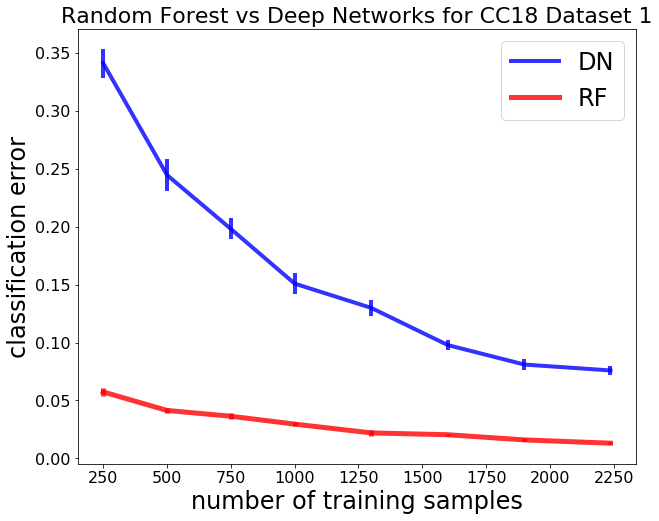

In [23]:
dn_evolution_mean = np.mean(dn_evolution, axis=1)
rf_evolution_mean = np.mean(rf_evolution, axis=1)

yerr_dn = stats.sem(dn_evolution, axis=1)
yerr_rf = stats.sem(rf_evolution, axis=1)

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)

ax.errorbar(
    training_sample_sizes,
    dn_evolution_mean,
    yerr=yerr_dn,
    linewidth=4,
    c="b",
    alpha=0.8,
    label="DN",
)
ax.errorbar(
    training_sample_sizes,
    rf_evolution_mean,
    yerr=yerr_rf,
    linewidth=5,
    c="r",
    alpha=0.8,
    label="RF",
)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("number of training samples", fontsize=24)
plt.ylabel("classification error", fontsize=24)
plt.title("Random Forest vs Deep Networks for CC18 Dataset 1", fontsize=22)

handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles, labels, prop={"size": 24})